In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
input_data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Travel%20Review%20Ratings/google_review_ratings.csv')

In [3]:
input_data.shape

(5456, 26)

In [4]:
input_data.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
input_data.head(5)

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [7]:
input_data.drop('Unnamed: 25', axis = 1, inplace = True)

In [8]:
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
input_data.columns = column_names

In [9]:
input_data[column_names].isnull().sum()

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

In [10]:
input_data = input_data.fillna(0)
input_data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [11]:
input_data['local_services'][input_data['local_services'] == '2\t2.']

2712    2\t2.
Name: local_services, dtype: object

In [12]:
local_services_mean = input_data['local_services'][input_data['local_services'] != '2\t2.']
input_data['local_services'][input_data['local_services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
input_data['local_services'] = input_data['local_services'].astype('float64')

<ipython-input-12-41cf706bf5fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['local_services'][input_data['local_services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))


In [13]:
input_data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [14]:
input_data[column_names[:12]].describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
input_data[column_names[12:]].describe()

,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
input_data_description = input_data.describe()
min_val = input_data_description.loc['min'] > 0
min_val[min_val]

parks                    True
theatres                 True
museums                  True
malls                    True
zoo                      True
restaurants              True
pubs_bars                True
local_services           True
hotels_other_lodgings    True
juice_bars               True
Name: min, dtype: bool

Text(0.5, 1.0, 'No of reviews under each category')

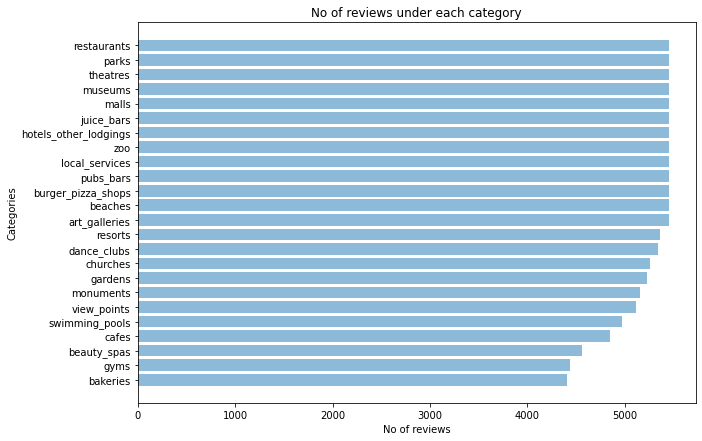

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()
%matplotlib inline
no_of_zeros = input_data[column_names[1:]].astype(bool).sum(axis=0).sort_values()

plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), no_of_zeros.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), no_of_zeros.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')

Text(0.5, 1.0, 'No of Categories vs No of reviews')

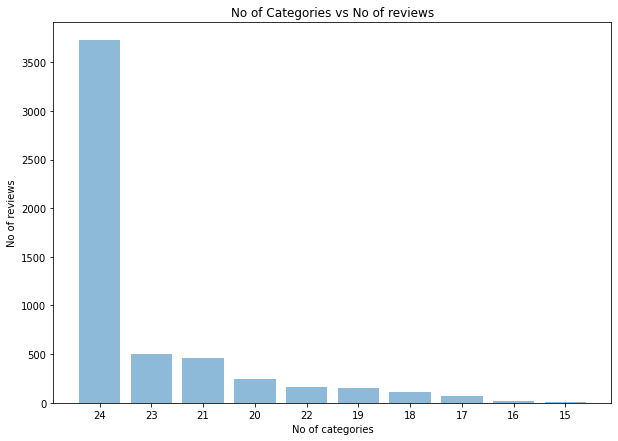

In [18]:
no_of_reviews = input_data[column_names[1:]].astype(bool).sum(axis=1).value_counts()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

Text(0.5, 1.0, 'Average rating per Category')

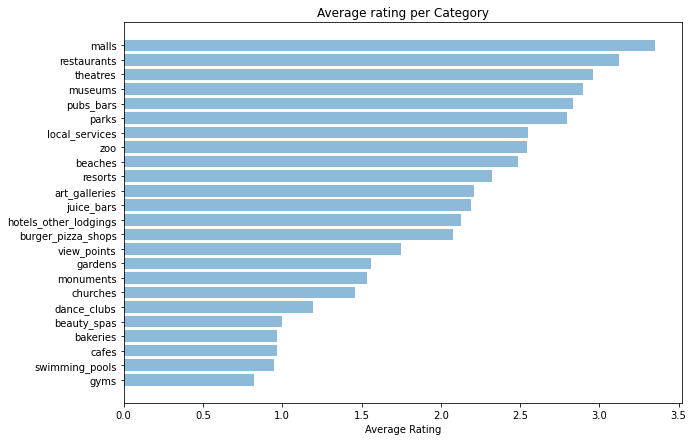

In [19]:
avg_rating = input_data[column_names[1:]].mean()
avg_rating = avg_rating.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

In [20]:
entertainment = ['theatres', 'dance_clubs', 'malls']
food_travel = ['restaurants', 'pubs_bars', 'burger_pizza_shops', 'juice_bars', 'bakeries', 'cafes']
places_of_stay = ['hotels_other_lodgings', 'resorts']
historical = ['churches', 'museums', 'art_galleries', 'monuments']
nature = ['beaches', 'parks', 'zoo', 'view_points', 'gardens']
services = ['local_services', 'swimming_pools', 'gyms', 'beauty_spas']
df_category_reviews = pd.DataFrame(columns = ['entertainment', 'food_travel', 'places_of_stay', 'historical', 'nature', 'services'])
df_category_reviews['entertainment'] = input_data[entertainment].mean(axis = 1)
df_category_reviews['food_travel'] = input_data[food_travel].mean(axis = 1)
df_category_reviews['places_of_stay'] = input_data[places_of_stay].mean(axis = 1)
df_category_reviews['historical'] = input_data[historical].mean(axis = 1)
df_category_reviews['nature'] = input_data[nature].mean(axis = 1)
df_category_reviews['services'] = input_data[services].mean(axis = 1)
df_category_reviews.describe()

,entertainment,food_travel,places_of_stay,historical,nature,services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.501045,2.027203,2.222609,2.021809,2.227604,1.330440
std,0.722411,0.549360,0.886588,0.584988,0.662531,0.580788
min,1.120000,0.721667,0.730000,0.557500,0.576000,0.205000
25%,1.963333,1.650000,1.470000,1.647500,1.762000,0.937500
50%,2.453333,2.027500,1.885000,1.977500,2.160000,1.245000
75%,2.916667,2.433750,3.160000,2.392500,2.656000,1.685000
max,5.000000,3.873333,5.000000,4.322500,4.520000,3.937500


In [21]:
from sklearn.neighbors import NearestNeighbors
input_data_matrix = input_data[column_names[1:]].values
knn_model = NearestNeighbors(n_neighbors=5).fit(input_data_matrix)
query_index = np.random.choice(input_data[column_names[1:]].shape[0])
distances, indices = knn_model.kneighbors(input_data[column_names[1:]].iloc[query_index, :].values.reshape(1,-1), n_neighbors = 5)
def compare_df(index, ind):        
    zero_cols_in = input_data.loc[index].astype(bool)
    zero_df_in = pd.DataFrame(zero_cols_in[zero_cols_in == True]).reset_index(level = 0)
    in_wo_rating = zero_df_in['index']
    sug_user = input_data.loc[ind]
    zero_cols_sug = sug_user.astype(bool)
    zero_df_sug = pd.DataFrame(zero_cols_sug[zero_cols_sug == True]).reset_index(level = 0)
    sug_wo_rating = zero_df_sug['index']
    sugg_list = list(set(sug_wo_rating) - set(in_wo_rating))
    return sugg_list
def recommend_knn(index):
    distances, indices = knn_model.kneighbors(input_data[column_names[1:]].iloc[index, :].values.reshape(1,-1), n_neighbors = 10)
    distances = np.sort(distances)
    for i in range(0,len(indices[0])):
        ind = np.where(distances.flatten() == distances[0][i])[0][0]
        sug_list = compare_df(index, indices[0][i]) 
        if len(sug_list) > 0:
            break
    return sug_list
print(recommend_knn(16))                                              

['swimming_pools']
